In [2]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import os
import csv
from datetime import datetime
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/Virtual env/z_inhomogenous_modeling/k_d_foaw/'
path1 = '/content/drive/MyDrive/Virtual env/z_inhomogenous_modeling/alpha_beta_pred/'
#os.listdir(path1)

Train point 75


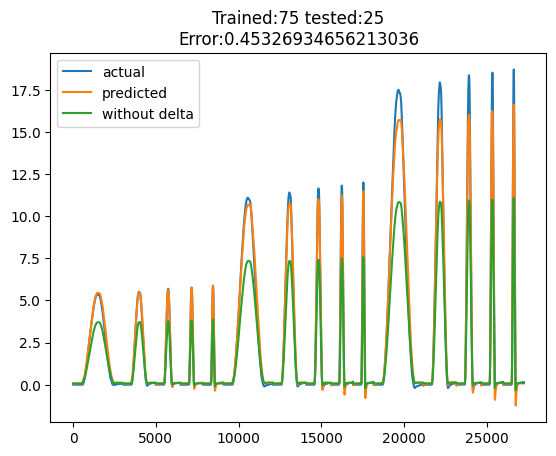

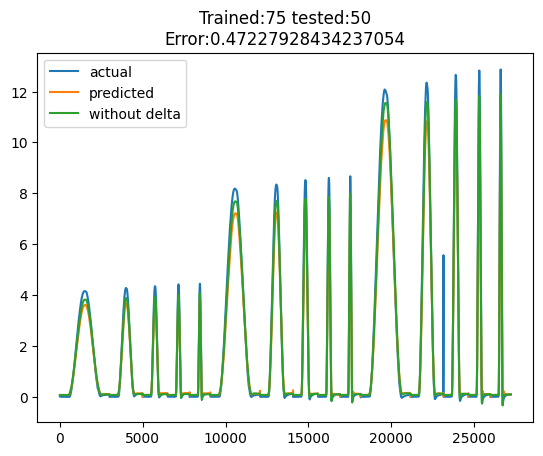

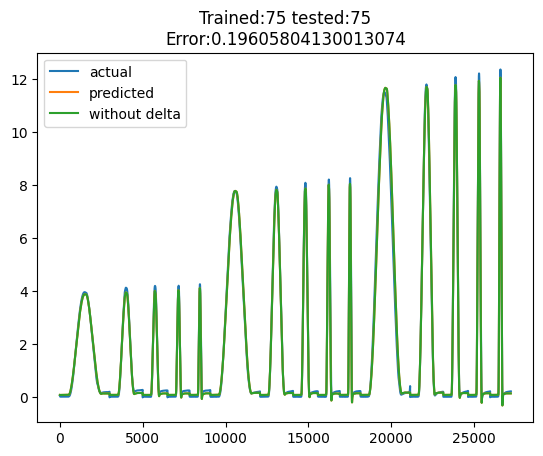

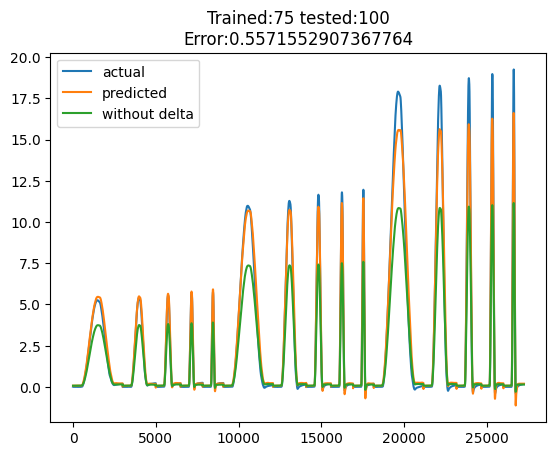

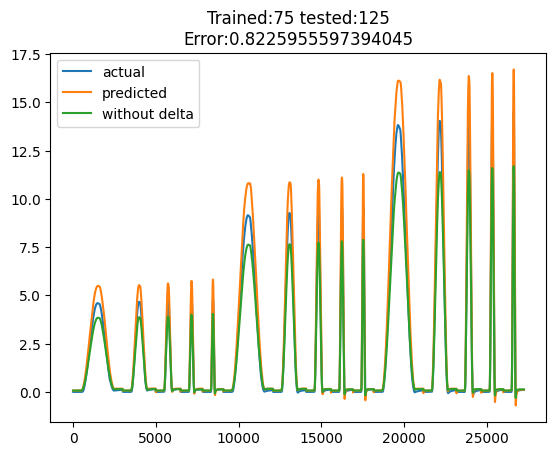

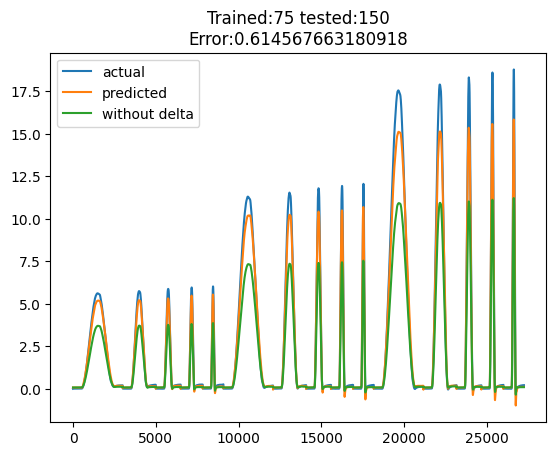

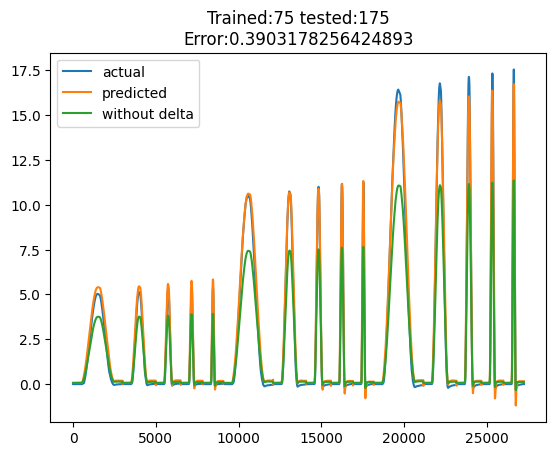

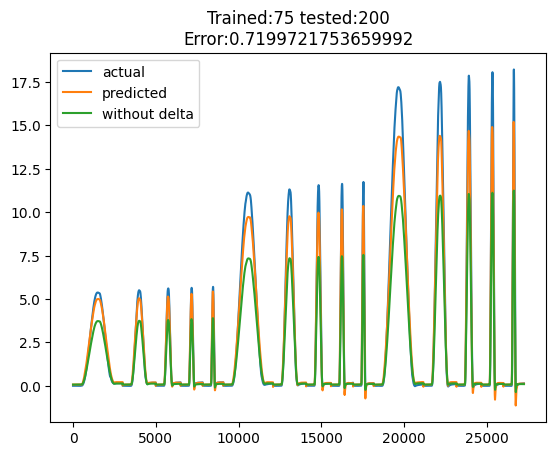

0.7669531929828688


In [7]:
for train_pt in range(75,76):
    print("Train point", train_pt)
    lr = LinearRegression()
    ytrain_alpha = np.array(pd.read_csv(path1+f'{train_pt}_force_using_alpha_beta_ecoflex_181221_derivative_data.csv'))

    pos_train = pd.read_csv(path+f'{train_pt}_foaw_pos_ecoflex_181221_data.csv')
    vel_train = pd.read_csv(path+f'{train_pt}_foaw_velocity_ecoflex_181221_data.csv')
    y_train = np.array(pd.read_csv(path+f'{train_pt}_foaw_force_ecoflex_181221_data.csv'))

    x_train = np.concatenate([np.array(pos_train),np.array(vel_train)],axis=1)
    lr.fit(x_train, y_train)
    error = []
    mini = 100
    for test_pt in range(1,201):
        print("Test Point", test_pt, end = '  ')
        ytest_alpha = np.array(pd.read_csv(path1+f'{test_pt}_force_using_alpha_beta_ecoflex_181221_derivative_data.csv'))
        
        y_test = np.array(pd.read_csv(path+f'{test_pt}_foaw_force_ecoflex_181221_data.csv'))
        pos_train = pd.read_csv(path+f'{test_pt}_foaw_pos_ecoflex_181221_data.csv')
        vel_train = pd.read_csv(path+f'{test_pt}_foaw_velocity_ecoflex_181221_data.csv')
        x_test = np.concatenate([np.array(pos_train),np.array(vel_train)],axis=1)
        y_pred = lr.predict(x_test)

        m = min(len(y_train), len(y_test), len(y_pred), len(ytest_alpha), len(ytrain_alpha))
        delta_f = ytest_alpha[:m]-ytrain_alpha[:m]
        y_pred_act = y_pred[:m]+delta_f[:m]

        error.append(mean_squared_error(y_test[:m],y_pred_act)**0.5)
        print(mean_squared_error(y_test[:m],y_pred_act)**0.5, end = '\r')

        if test_pt%25==0:
            plt.plot(range(m), y_test[:m], label = 'actual')
            plt.plot(range(m), y_pred_act[:m], label = 'predicted')
            plt.plot(range(m), y_pred[:m], label = 'without delta')
            plt.legend()
            plt.title(f'Trained:{train_pt} tested:{test_pt}\nError:{mean_squared_error(y_test[:m],y_pred_act)**0.5}')
            plt.show()

    error = np.array(error)
    mini = min(mini, np.mean(error))
    statement = f'For point = {train_pt}, mean rmse ={np.mean(error)}, Standard deviation = {np.std(error)}\n'
    with open('resuts.txt','a') as f:
        f.write(statement)



print(mini)

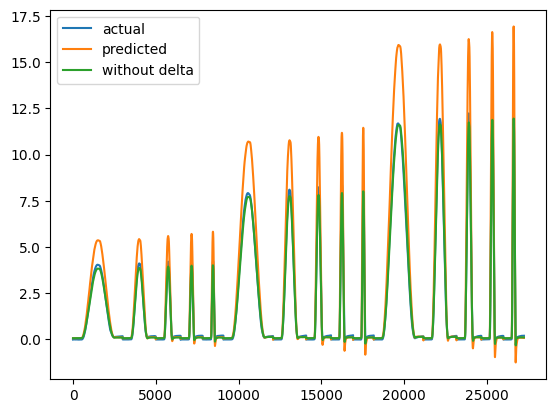

In [ ]:
plt.plot(range(m), y_test[:m], label = 'actual')
plt.plot(range(m), y_pred_act[:m], label = 'predicted')
plt.plot(range(m), y_pred[:m], label = 'without delta')
plt.legend()
plt.show()